In [17]:
cwd = os.getcwd()
cwd

NameError: name 'os' is not defined

In [18]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28})

df = pd.read_csv('/home/jovyan/work/Desktop/ORF307/HW4Q1.csv')
# df = pd.read_csv('/Users/chimaoparaji/Desktop/ORF307/HW4Q1.csv')
y = df['y'].values
t = df['t'].values

alpha and beta for least squares, respectively: [4.18407201 0.57548375]
alpha and beta for 1 norm, respectively: [4.94589135 0.97164175]
alpha and beta for inifnity norm, respectively: [ 3.93351602 -0.52490305]


/tmp/ipykernel_141/2689916474.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_141/2689916474.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


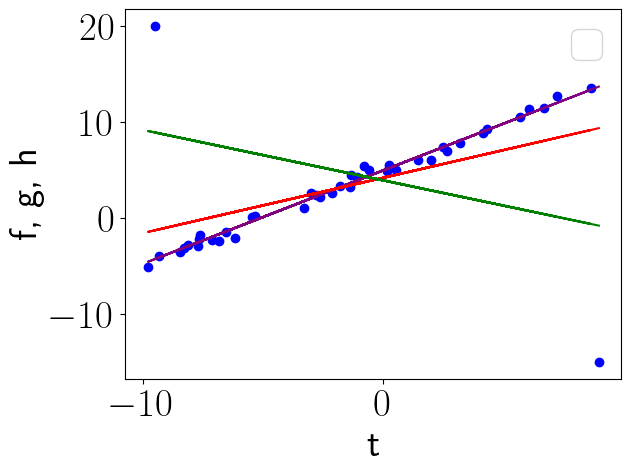

In [19]:
#1

# Solve least squares problem
col = np.ones_like(t)
A = np.column_stack((col, t))
b = y
x = cp.Variable(2)
prob_ls = cp.Problem(cp.Minimize(cp.sum_squares(A @ x - b)))
prob_ls.solve()
x_ls = x.value
r_ls = A @ x_ls - b

# Solve l-1 norm problem
prob_l1 = cp.Problem(cp.Minimize(cp.norm(A @ x - b, 1)))
prob_l1.solve()
x_l1 = x.value
r_l1 = A @ x_l1 - b

#Solve l-infinity norm problem
prob_infinity = cp.Problem(cp.Minimize(cp.norm(A @ x - b, np.inf)))
prob_infinity.solve()
x_infinity = x.value
r_l1 = A @ x_l1 - b
print('alpha and beta for least squares, respectively:', x_ls)
print('alpha and beta for 1 norm, respectively:', x_l1)
print('alpha and beta for inifnity norm, respectively:', x_infinity)



f = x_l1[0] + ( x_l1[1] * t )
g = x_ls[0] + (x_ls[1] * t )
h = x_infinity[0] + ( x_infinity[1] * t) 
plt.scatter(t, y, color='blue')
plt.xlabel("t values")
plt.ylabel("y values")
plt.legend()

plt.plot(t, f, color='purple')
plt.plot(t, g, color = 'red')
plt.plot(t, h, color = 'green')
plt.xlabel("t")
plt.ylabel("f, g, h")
plt.legend()

#Answer
# I notice that out of all of the functions, the one with solutions from the one norm 
# fits through the data points the best, and is not as influenced by the outlier points

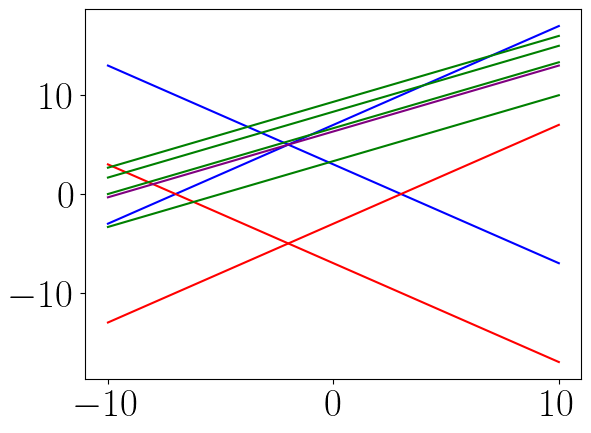

In [7]:
#2


x1 = np.linspace(-10, 10, 5)
x2 = 3 - x1 
x3 = x1 - 3
x4 = 7 + x1
x5 = -x1 - 7

# set equal to 30
#x6 = 20 - (2/3) * x1
#x7 = (2/3) * x1

# Brute force -set equal to 20, 10, 5 and 2 - 10 was close, so kept going, and found when set equal to 11 to be optimal
x8 = (10/3) + (2/3) * x1
x9 = (20/3) + (2/3) * x1  
x10 = (25/3) + (2/3) * x1
x11 = (28/3) + (2/3) * x1
x12 = (19/3) + (2/3) * x1 # set equal to 11 

 

plt.plot(x1, x2, label=r'$f(x) = |x|$', color='blue')
plt.plot(x1, x3, label=r'$f(x) = |x|$', color='red')
plt.plot(x1, x4, label=r'$f(x) = |x|$', color='blue')
plt.plot(x1, x5, label=r'$f(x) = |x|$', color='red')
#plt.plot(x1, x6, label=r'$f(x) = |x|$', color='green')
#plt.plot(x1, x7, label=r'$f(x) = |x|$', color='green')
plt.plot(x1, x8, label=r'$f(x) = |x|$', color='green')
plt.plot(x1, x9, label=r'$f(x) = |x|$', color='green')
plt.plot(x1, x10, label=r'$f(x) = |x|$', color='green')
plt.plot(x1, x11, label=r'$f(x) = |x|$', color='green')
plt.plot(x1, x12, label=r'$f(x) = |x|$', color='purple') # to indicate optimal 

#Answer - optimal solution is x1 = -2 and x2 = 5, which occurs at a minimum value of 11 














In [31]:
#3

#Part B

# Sarurated least-squares :
# A_pd = pd.read_csv('/content/drive/MyDrive/HW4Q3.csv', header=None)
A_pd = pd.read_csv('/home/jovyan/work/Desktop/ORF307/HW4Q3.csv', header=None)
A = A_pd.to_numpy()
p = x = cp.Variable(7)
I_des = 2
objective = cp.norm(A @ p - I_des, 2)
prob_inf = cp.Problem(cp.Minimize(objective))
prob_inf.solve()
p_sol = p.value
for i in range(len(p_sol)): 
    if p_sol[i] < 0 : 
        p_sol[i] = 0
    if p_sol[i] > 1: 
        p_sol[i] = 1
    else: p_sol[i] = p_sol[i]

#Answer
print(' feasible p saturated least squares =', p_sol)
inf = np.linalg.norm(A @ p_sol - I_des, np.inf)
print('phi(p) for saturated least squares:', inf)


#Weighted Least Squares : 

p2 = cp.Variable(7)

#Tested out differnet mu values, and got 10 as 
mu = 10
objective2 = cp.sum_squares(A @ p2 - I_des) + mu * cp.sum_squares(p2 - .5)
prob_weight = cp.Problem(cp.Minimize(objective2))
prob_weight.solve()
p2_sol = p2.value


print('feasible p weighted least squares:', p2_sol)
inf2 = np.linalg.norm(A @ p2_sol - I_des, np.inf)

#Answer
print('Smallest mu:',mu)
print('phi(p) for weighted least squares:', inf2)
#Smallest u value that kept p feasible was 2.09 

#Part C

#make decision variable
t = cp.Variable(1)
p3 = cp.Variable(7)
#define objective
objective3 = t
constraints = A @ p3 - I_des <= t, -1 * (A @ p3 - I_des) <= t, 0 <= p3, p3 <= 1

#make problem and solve
prob = cp.Problem(cp.Minimize(objective3),constraints)
prob.solve()
p3_sol = p3.value
print('feasible p part c:', p3_sol)
inf3 = np.linalg.norm(A @ p3_sol - I_des, np.inf)
print('phi(p) for part c method:',inf3)
#Answer - the phi(p) I got from part c using the formation from part a is smaller than both the weighted and saturated phi(p) 
#valures from part B. This shows that part c's method is best at minimizing maximum deviation from desired iluumination level


 feasible p saturated least squares = [1.         0.         0.52322558 0.         1.         0.
 0.        ]
phi(p) for saturated least squares: 3.246955570975741
feasible p weighted least squares: [0.55512499 0.47945002 0.00394838 0.35255387 0.39266064 0.46432425
 0.45392494]
Smallest mu: 10
phi(p) for weighted least squares: 1.3355090544879826
feasible p part c: [9.99999990e-01 5.70808574e-01 2.65742152e-10 7.83801694e-09
 1.95973433e-08 3.70580701e-01 9.99999945e-01]
phi(p) for part c method: 1.0529389811796728
